# Medical Insurance Cost Prediction
## Data Loading and Preparation

### Downloading the Dataset
This cell downloads the insurance dataset from GitHub.

In [115]:
from urllib.request import urlretrieve

csv_url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'

urlretrieve(csv_url, 'insurance.csv')

('insurance.csv', <http.client.HTTPMessage at 0x166cb64ff20>)

### Loading the Data
This cell loads the downloaded CSV file into a pandas DataFrame.

In [116]:
import pandas as pd

medical_df = pd.read_csv('insurance.csv')

### Displaying the Data
This cell shows the loaded dataset.

In [117]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [118]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The dataset contains 1338 entries and 7 columns. The columns `age`, `children`, and `charges` are numerical, while `sex`, `smoker`, and `region` are strings. None of the columns contain missing values, as all have 1338 non-null entries. The dataset is ready for further analysis.

In [119]:
medical_df.describe()



,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


No unreasonable values like negative ages were found here. Therefore, not much data cleaning is required. Also, the `charges` column seems to be significantly skewed. We can use log transformation to make it more normal.

The `describe()` method provides valuable insights into the dataset:

- The `age` column has a minimum value of 18 and a maximum value of 64, indicating that the dataset covers a wide range of age groups.
- The `bmi` column has a mean of approximately 30.66, with a minimum of 15.96 and a maximum of 53.13. This suggests that the dataset includes individuals with varying body mass indices, including some with obesity.
- The `children` column ranges from 0 to 5, showing that some individuals have no children, while others have up to five.
- The `charges` column has a mean of approximately 13,270 and a maximum of 63,770, indicating a significant variation in medical costs. The high standard deviation suggests that the distribution of charges is highly skewed, which aligns with the earlier observation about the need for log transformation.


In [120]:
import numpy as np

# Apply log transformation to the 'charges' column
medical_df['log_charges'] = np.log(medical_df['charges'])

# Display the updated DataFrame
medical_df[['charges', 'log_charges']]

,charges,log_charges
0,16884.92400,9.734176
1,1725.55230,7.453302
2,4449.46200,8.400538
3,21984.47061,9.998092
4,3866.85520,8.260197
...,...,...
1333,10600.54830,9.268661
1334,2205.98080,7.698927
1335,1629.83350,7.396233
1336,2007.94500,7.604867


### **Importing Visualization Libraries**

We will use **Plotly**, **Matplotlib**, and **Seaborn** for data visualization.  
These libraries will help us create **insightful** and **interactive** plots.

In [121]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Setting Visualization Styles
We will configure the default styles for our visualizations to make them more appealing.

In [122]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#f0f0f0'

### Statistical Summary of Age
We will calculate and display the statistical summary of the `age` column to understand the distribution of ages in the dataset.


In [123]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

### Age Distribution
The following histogram shows the distribution of ages in the dataset. A box plot is  included and can be used to compare the distribution of ages in the dataset with the distribution of ages in the population

In [124]:
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [125]:
from IPython.display import display, HTML

conclusion_html = """
<div style="font-family: 'Courier New'; line-height: 1.8; color: #333;">
    <h3 style="color: #16a085;">Conclusion:</h3>
    <p style="font-size: 16px; color: #11e411f9;"> The higher frequency of individuals aged 18 and 19 
    might be attributed to the legal age requirement for obtaining insurance from this company or a potential incentive, 
    such as a lower insurance premium, for signing up before the age of 20.</p>
    
    <h3 style="color: #e74c3c; ">Next Steps:</h3>
    <ul style="font-size: 15px; color: #dc1017;">
        <li>Investigate other key features like <b style="color: #3720e6;">BMI</b>, <b style="color: #3498db;">charges</b>, and <b style="color: #2ecc71;">region</b>.</li>
        <li>Analyze relationships between features, such as <b style="color: #e67e22;">age vs. charges</b> or <b style="color: #e74c3c;">BMI vs. charges</b>.</li>
        <li>Prepare the dataset for predictive modeling by encoding categorical variables and scaling numerical features.</li>
    </ul>
</div>
"""

display(HTML(conclusion_html))

### Body Mass Index

Let's look at the distribution of BMI (Body Mass Index) of customers, using a histogram and box plot.

In [126]:
fig = px.histogram(medical_df, 
                       x='bmi', 
                      marginal='box', 
                      color_discrete_sequence=['red'], 
                       title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

The measurements of body mass index seem to form a [Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution) centered around the value 30, with a few outliers towards the right. Here's how BMI values can be interpreted ([source](https://study.com/academy/lesson/what-is-bmi-definition-formula-calculation.html)):

![](https://i.imgur.com/lh23OiY.jpg)

> The distribution of ages forms a uniform distribution because the dataset likely includes individuals from a wide range of age groups, with no specific age group being overrepresented. This uniformity might be due to the sampling strategy or the nature of the insurance dataset, which aims to cover a diverse population.  
>  
> On the other hand, the distribution of BMIs forms a Gaussian distribution because BMI is a biological measure influenced by natural variations in human body composition. Most individuals tend to have BMI values around the average (e.g., 30 in this dataset), with fewer individuals having extremely low or high BMI values, resulting in a bell-shaped curve. This is a common pattern for many biological and natural phenomena.
>
> 

### **Charges**

The **"charges"** column represents the **annual medical expenses** incurred by customers.  
### Distribution of Charges

This is the **target variable** for our analysis.

We will visualize the **"charges"** column using a histogram to understand its distribution.  
Additionally, we will compare charges between **smokers** and **non-smokers** to observe the impact of smoking on medical expenses.



In [127]:
fig = px.histogram(medical_df, 
                    x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['red', 'green'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

We can make the following observations from the above graph:

* For most customers, the annual medical charges are under $10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"
* There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is $7300, the median for smokers is close to $35,000.




# Distribution of charges by sex


In [128]:
fig_sex = px.histogram(medical_df, 
                       x='charges', 
                       color='sex', 
                       marginal='box', 
                       color_discrete_sequence=['blue', 'orange'], 
                       title='Distribution of Medical Charges by Sex')
fig_sex.update_layout(bargap=0.1)
fig_sex.show()


```markdown
We can make the following observations from the above graph:

* The distribution of medical charges for both males and females is highly skewed, with most charges below $10,000.
* Males and females have similar distributions for lower medical charges, but males tend to have slightly higher charges in the upper range.
* The median charges for both sexes are relatively close, indicating no significant difference in central tendency.
```


# Distribution of charges by region


In [129]:
fig_region = px.histogram(medical_df, 
                          x='charges', 
                          color='region', 
                          marginal='box', 
                          title='Distribution of Medical Charges by Region')
fig_region.update_layout(bargap=0.1)
fig_region.show()

We can make the following observations from the above graph:

* The distribution of medical charges varies significantly across regions, with most charges concentrated below $10,000 in all regions.
* The southeast region has a higher proportion of individuals with higher medical charges compared to other regions.
* The southwest and northwest regions show similar distributions, with fewer individuals incurring very high medical charges.
* The northeast region has a slightly wider spread of charges, indicating more variability in medical expenses.

### **Smoker**

Let us delve into the **"smoker"** column, which categorizes individuals as either **"yes"** (smoker) or **"no"** (non-smoker).  
To better understand its distribution, we will visualize it using a **histogram**.  
This will provide insights into the proportion of smokers and non-smokers in the dataset.

In [130]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [131]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

It appears that 20% of customers have reported that they smoke.We can also see that smoking appears a more common habit among males.


# checking if the smoking rate in dataset matches the national average  in 2010

In [132]:
# Calculate the percentage of smokers in the dataset
smoker_percentage = (medical_df['smoker'].value_counts(normalize=True) * 100)['yes']
print(f"Percentage of smokers in the dataset: {smoker_percentage:.2f}%")

# National average smoking rate in 2010 (source: CDC)
national_average_2010 = 19.3  # in percentage

# Compare the dataset percentage with the national average
if abs(smoker_percentage - national_average_2010) < 1:
    print("The smoking rate in the dataset closely matches the national average in 2010.")
else:
    print("The smoking rate in the dataset does not closely match the national average in 2010.")

Percentage of smokers in the dataset: 20.48%
The smoking rate in the dataset does not closely match the national average in 2010.


# Visualization of the distribution of the 'sex' column with 'smoker' column


In [133]:
fig_sex = px.histogram(medical_df, 
                       x='sex', 
                       color='smoker', 
                       title='Distribution of Sex by Smoking Status')
fig_sex.update_layout(bargap=0.1)
fig_sex.show()



# Visualization of the distribution of the 'region' column with 'smoker' column


In [134]:
fig_region = px.histogram(medical_df, 
                          x='region', 
                          color='smoker', 
                          title='Distribution of Region by Smoking Status')
fig_region.update_layout(bargap=0.1)
fig_region.show()



# Visualization of the distribution of the 'children' column with 'smoker' column


In [135]:
fig_children = px.histogram(medical_df, 
                            x='children', 
                            color='smoker', 
                            title='Distribution of Number of Children by Smoking Status')
fig_children.update_layout(bargap=0.1)
fig_children.show()

Having looked at individual columns, we can now visualize the relationship between "charges" (the value we wish to predict) and other columns.

### Age and Charges

Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

In [136]:
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

We can make the following observations from the above chart:

* The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.


* We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

     1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
     
     2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
     
     3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.
     



### BMI and Charges

Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

In [139]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

### Observations from BMI vs. Charges Plot

- **Higher BMI, Higher Charges:** Individuals with higher BMI tend to have higher medical charges, especially for smokers.
- **Smokers vs. Non-Smokers:** Smokers generally incur significantly higher medical charges compared to non-smokers, regardless of BMI.
- **Clusters of Points:** There are distinct clusters of points:
  - Non-smokers with relatively lower charges.
  - Smokers with higher charges, especially at higher BMI levels.
- **Outliers:** A few individuals with very high charges are noticeable, likely due to severe medical conditions.


### Why Use Violin Plots?

Violin plots are used to visualize the distribution of a dataset and its probability density. They combine the benefits of box plots and kernel density plots, providing a detailed view of the data's spread, central tendency, and variability.

### Structure of Violin Plots

1. **Kernel Density Estimation (KDE):** The shape of the violin represents the data's density, showing where values are concentrated.
2. **Box Plot Elements:** Inside the violin, a box plot may display the median, interquartile range (IQR), and potential outliers.
3. **Symmetry:** The plot is symmetric around the central axis for easier comparison.
4. **Grouping:** Violin plots can be grouped by categories to compare distributions across different groups.


# Violin plot for charges vs. children


In [143]:
fig_children_violin = px.violin(medical_df, 
                                x='children', 
                                y='charges', 
                                color='smoker', 
                                box=True, 
                                points='all', 
                                title='Charges vs. Number of Children')
fig_children_violin.show()



# Violin plot for charges vs. sex


In [153]:
fig_sex_violin = px.violin(medical_df, 
                           x='sex', 
                           y='charges', 
                           color='smoker', 
                           box=True, 
                           points='all', 
                           title='Charges vs. Sex')
fig_sex_violin.show()



 Conclusion

The violin plot reveals that smokers consistently incur higher charges than non-smokers across both sexes.

# Violin plot for charges vs. region


In [ ]:
fig_region_violin = px.violin(medical_df, 
                              x='region', 
                              y='charges', 
                              color='smoker', 
                              box=True, 
                              points='all', 
                              title='Charges vs. Region')
fig_region_violin.show()



 The violin plot shows that the southeast region has a wider spread of charges, indicating higher variability. Smokers consistently have higher charges across all regions.

# Bar plot for average charges by smoker status


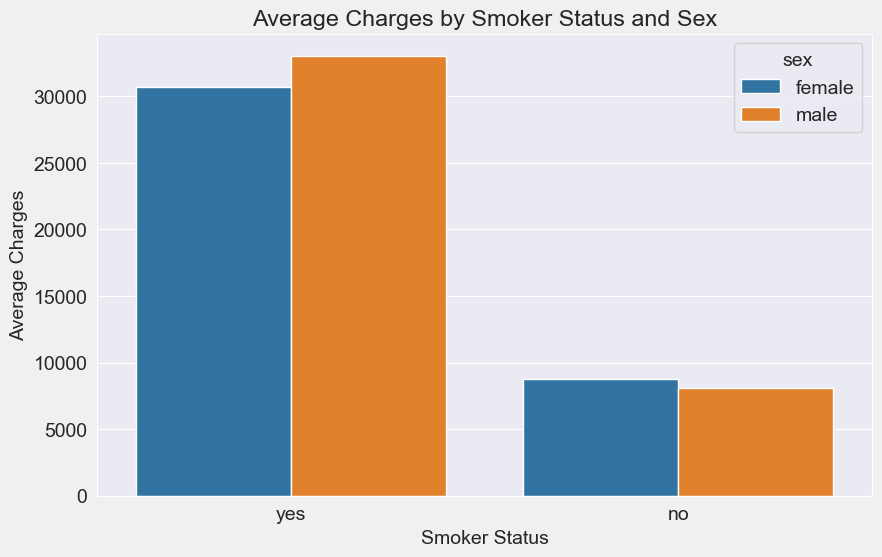

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=medical_df, x='smoker', y='charges', hue='sex', errorbar=None)
plt.title('Average Charges by Smoker Status and Sex')
plt.ylabel('Average Charges')
plt.xlabel('Smoker Status')
plt.show()


 Smokers incur significantly higher average medical charges compared to non-smokers, regardless of sex. The difference between males and females is minimal within each smoker category.

### Correlation

As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the _correlation coefficient_, which can be computed using the `.corr` method of a Pandas series.